In [ ]:
#!pip install nibabel

# CAMUS
# patient0101_4CH_half_sequence_gt.nii.gz : (708, 584, 14)
# patient0101_4CH_half_sequence.nii.gz : (708, 584, 14)
# patient0101_4CH_ES_gt.nii.gz : (708, 584)
# patient0101_4CH_ES.nii.gz : (708, 584)
# patient0101_4CH_ED_gt.nii.gz : (708, 584)
# patient0101_4CH_ED.nii.gz : (708, 584)

"""
Firt frame of "half_sequence" = ED
Last frame of "half_sequence" = ES
"""

In [ ]:
import numpy as np
import glob
import nibabel as nib

root = "/content/drive/MyDrive/video_recognition_proj/data/CAMUS_public/database_nifti"

folders = glob.glob(f"{root}/*")
folder = folders[100]

files = glob.glob(f"{folder}/*_4CH_*")

for f in files:
    img = nib.load(f)
    data = img.get_fdata()
    print(f.split("/")[-1], ":", data.shape)

patient0101_4CH_half_sequence_gt.nii.gz : (708, 584, 14)
patient0101_4CH_half_sequence.nii.gz : (708, 584, 14)
patient0101_4CH_ES_gt.nii.gz : (708, 584)
patient0101_4CH_ES.nii.gz : (708, 584)
patient0101_4CH_ED_gt.nii.gz : (708, 584)
patient0101_4CH_ED.nii.gz : (708, 584)


In [ ]:
original_image = nib.load(f"{folder}/patient0101_4CH_half_sequence.nii.gz")
original_image.shape

(708, 584, 14)

In [ ]:
segmentation_mask = nib.load(f"{folder}/patient0101_4CH_half_sequence_gt.nii.gz")
segmentation_mask = segmentation_mask.get_fdata()[:,:,0]
#segmentation_mask = proc_masks(segmentation_mask)[:,:,1]


def proc_masks(raw_labels):
    proc_labels = np.stack([np.where(raw_labels==0,1,0),
                            np.where(raw_labels==1,1,0),
                            np.where(raw_labels==2,1,0),
                            np.where(raw_labels==3,1,0)], axis=-1)
    return proc_labels



In [ ]:
np.unique(segmentation_mask)

array([0., 1., 2., 3.])

(-0.5, 583.5, 707.5, -0.5)

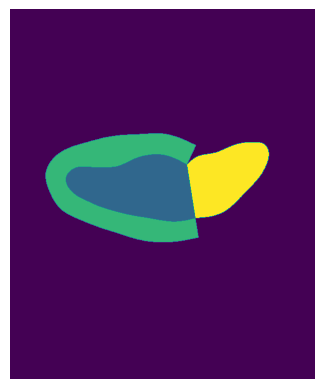

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(segmentation_mask)
plt.axis('off')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
image1 = Image.open('mask2.png')  # Load your first image
image1.size

(584, 708)

In [ ]:
from PIL import Image

# Load the images you want to stack
image1 = Image.open('original_image.png')  # Load your first image
image2 = Image.open('mask1.png')  # Load your second image

# Define the alpha (transparency) value for image2 (0 = fully transparent, 255 = fully opaque)
alpha = 128  # Adjust this value as needed

# Adjust the transparency of image2
image2 = image2.convert("RGBA")  # Convert image2 to RGBA mode to enable transparency
data = image2.getdata()
new_data = []
for item in data:
    r, g, b, a = item
    new_data.append((r, g, b, alpha))

image2.putdata(new_data)

# Stack the two images together
result = Image.alpha_composite(image1.convert("RGBA"), image2)

# Save or display the resulting image
#result.show()  # Show the resulting image
result.save('output.png')  # Save the resulting image to a file


ValueError: ignored

In [ ]:
image1.size

(640, 480)

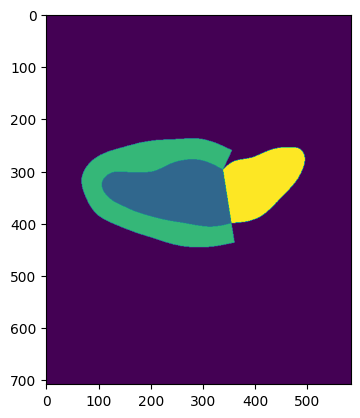

In [ ]:
plt.imshow(segmentation_mask)

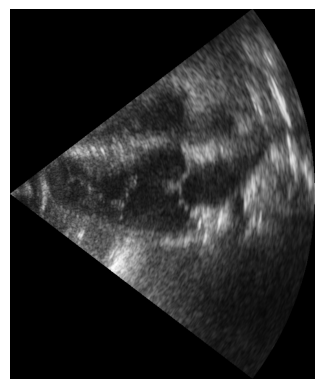

In [ ]:
original_image = nib.load(f"{folder}/patient0101_4CH_half_sequence.nii.gz")
original_image = original_image.get_fdata()[:,:,0]
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.savefig('original.png')

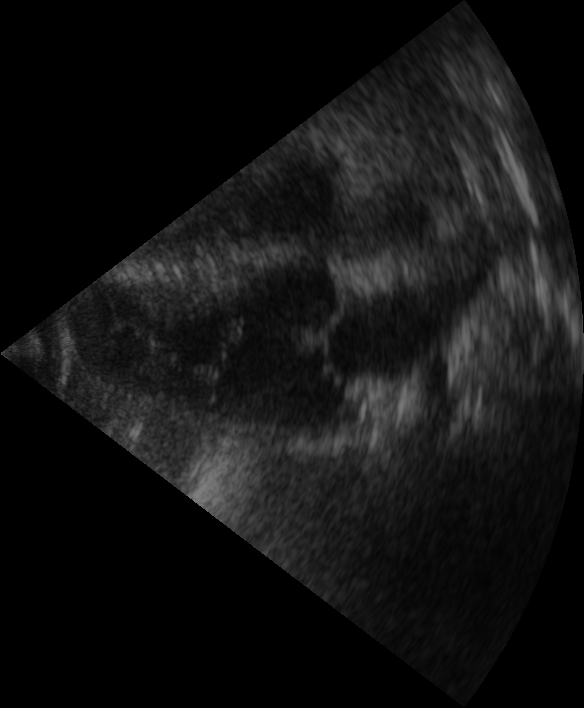

-1

In [ ]:
import numpy as np
import cv2


# Assuming you have 'original_image' and 'segmentation_mask' as NumPy arrays
original_image = nib.load(f"{folder}/patient0101_4CH_half_sequence.nii.gz")
original_image = original_image.get_fdata()[:,:,0]

segmentation_mask = nib.load(f"{folder}/patient0101_4CH_half_sequence_gt.nii.gz")
segmentation_mask = segmentation_mask.get_fdata()[:,:,0]
segmentation_mask = proc_masks(segmentation_mask)[:,:,1]

# Set the transparency factor (0.0 = fully transparent, 1.0 = fully opaque)
transparency_factor = 0.5  # Adjust this value as needed

# Resize the segmentation mask if needed
if original_image.shape[:2] != segmentation_mask.shape[:2]:
    segmentation_mask = cv2.resize(segmentation_mask, (original_image.shape[1], original_image.shape[0]))

# Create a copy of the original image
result = original_image.copy()

# Apply transparency to the segmentation mask
segmentation_mask = (segmentation_mask * transparency_factor).astype(np.uint8)

# Overlay the mask on the original image
result[:segmentation_mask.shape[0], :segmentation_mask.shape[1]] = (
    result[:segmentation_mask.shape[0], :segmentation_mask.shape[1]] * (1 - transparency_factor)
    + segmentation_mask * transparency_factor
)

from google.colab.patches import cv2_imshow
# Display or save the result
cv2_imshow(result)
cv2.waitKey(0)
# cv2.imwrite("result_image.jpg", result)
# cv2.destroyAllWindows()


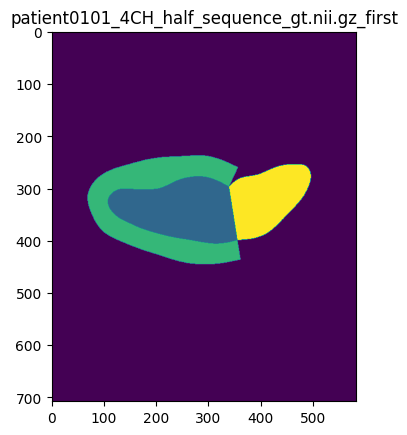

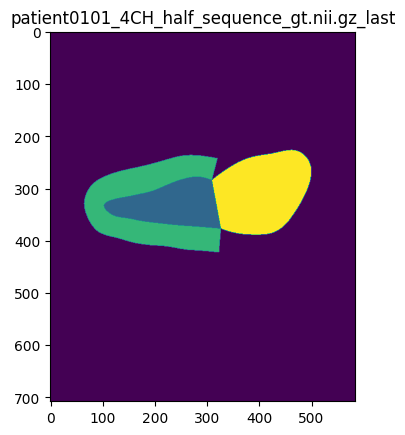

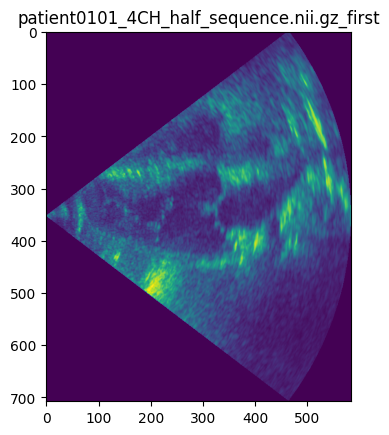

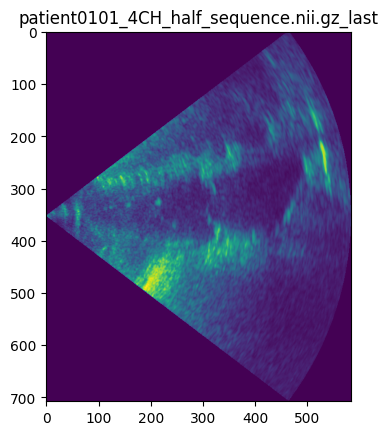

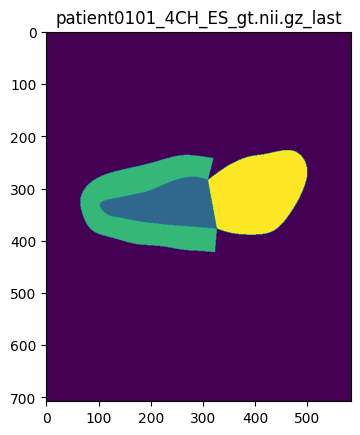

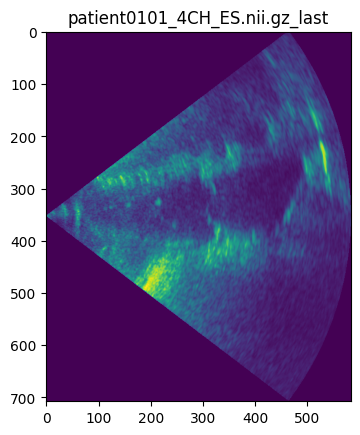

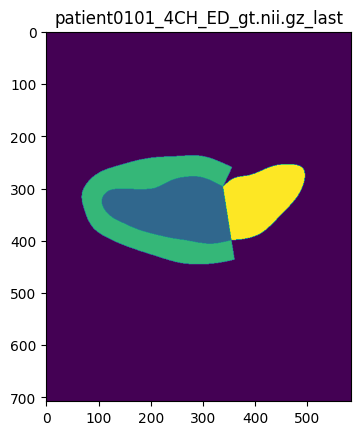

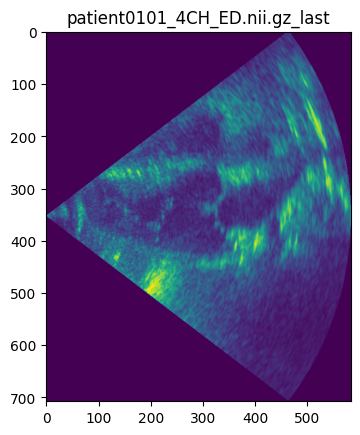

In [ ]:
from matplotlib import pyplot as plt

for f in files:
    img = nib.load(f)
    data = img.get_fdata()
    if len(data.shape)!=2:
        plt.title(f.split("/")[-1] + "_first")
        plt.imshow(data[:,:,0])
        plt.show()

        data = data[:,:,-1]

    plt.title(f.split("/")[-1]+ "_last")
    plt.imshow(data)
    plt.show()

In [ ]:
def load_as_np(f):
    img = nib.load(f)
    data = img.get_fdata()
    return data

np_first_seq = load_as_np(files[1])
np_es = load_as_np(files[3])
np_ed = load_as_np(files[5])


In [ ]:
shapes = np_first_seq[:,:,0].shape

np.sum(np_first_seq[:,:,-1] == np_es)/(shapes[0]*shapes[1])

1.0

In [ ]:
"""Summary
1.
So, echonet only trains model based on the average loss of the ED and ES.
It doesn't really use the entire video for training.

2.
And it only uses one ED and one ES for training

"""


"""Echonet dataset"""

# The targets represent:
    # ``Filename'' (string): filename of video
    # ``EF'' (float): ejection fraction
    # ``EDV'' (float): end-diastolic volume
    # ``ESV'' (float): end-systolic volume
    # ``LargeIndex'' (int): index of large (diastolic) frame in video
    # ``SmallIndex'' (int): index of small (systolic) frame in video
    # ``LargeFrame'' (np.array shape=(3, height, width)): normalized large (diastolic) frame
    # ``SmallFrame'' (np.array shape=(3, height, width)): normalized small (systolic) frame
    # ``LargeTrace'' (np.array shape=(height, width)): left ventricle large (diastolic) segmentation
    #     value of 0 indicates pixel is outside left ventricle
    #                 1 indicates pixel is inside left ventricle
    # ``SmallTrace'' (np.array shape=(height, width)): left ventricle small (systolic) segmentation
    #     value of 0 indicates pixel is outside left ventricle
    #                 1 indicates pixel is inside left ventricle


"""training core"""
def run_epoch(model, dataloader, train, optim, device):
    total = 0.
    n = 0

    pos,neg = 0,0
    pos_pix,neg_pix = 0, 0

    large_inter, large_union = 0,0
    small_inter, small_union = 0, 0
    large_inter_list, large_union_list = [], []
    small_inter_list, small_union_list = [], []

    with tqdm.tqdm(total=len(dataloader)) as pbar:
        for (_, (large_frame, small_frame, large_trace, small_trace)) in dataloader:
            # Count number of pixels in/out of human segmentation
            pos += (large_trace == 1).sum().item()
            pos += (small_trace == 1).sum().item()
            neg += (large_trace == 0).sum().item()
            neg += (small_trace == 0).sum().item()

            # Count number of pixels in/out of computer segmentation
            pos_pix += (large_trace == 1).sum(0).to("cpu").detach().numpy()
            pos_pix += (small_trace == 1).sum(0).to("cpu").detach().numpy()
            neg_pix += (large_trace == 0).sum(0).to("cpu").detach().numpy()
            neg_pix += (small_trace == 0).sum(0).to("cpu").detach().numpy()

            # Run prediction for diastolic frames and compute loss
            large_frame = large_frame.to(device)
            large_trace = large_trace.to(device)
            y_large = model(large_frame)["out"]
            loss_large = torch.nn.functional.binary_cross_entropy_with_logits(y_large[:, 0, :, :], large_trace, reduction="sum")
            # Compute pixel intersection and union between human and computer segmentations
            large_inter += np.logical_and(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
            large_union += np.logical_or(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
            large_inter_list.extend(np.logical_and(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))
            large_union_list.extend(np.logical_or(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))

            # Run prediction for systolic frames and compute loss
            small_frame = small_frame.to(device)
            small_trace = small_trace.to(device)
            y_small = model(small_frame)["out"]
            loss_small = torch.nn.functional.binary_cross_entropy_with_logits(y_small[:, 0, :, :], small_trace, reduction="sum")
            # Compute pixel intersection and union between human and computer segmentations
            small_inter += np.logical_and(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
            small_union += np.logical_or(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
            small_inter_list.extend(np.logical_and(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))
            small_union_list.extend(np.logical_or(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))

            # Take gradient step if training
            loss = (loss_large + loss_small) / 2
            if train:
                optim.zero_grad()
                loss.backward()
                optim.step()

            # Accumulate losses and compute baselines
            total += loss.item()
            n += large_trace.size(0)
            p = pos / (pos + neg)
            p_pix = (pos_pix + 1) / (pos_pix + neg_pix + 2)

            # Show info on process bar
            pbar.set_postfix_str("{:.4f} ({:.4f}) / {:.4f} {:.4f}, {:.4f}, {:.4f}".format(total / n / 112 / 112,
                                                                                          loss.item() / large_trace.size(0) / 112 / 112,
                                                                                          -p * math.log(p) - (1 - p) * math.log(1 - p),
                                                                                           (-p_pix * np.log(p_pix) - (1 - p_pix) * np.log(1 - p_pix)).mean(),
                                                                                          2 * large_inter / (large_union + large_inter),
                                                                                          2 * small_inter / (small_union + small_inter)))
            pbar.update()

    # arraylize
    large_inter_list = np.array(large_inter_list)
    #...

    return (total / n / 112 / 112,
            large_inter_list,
            large_union_list,
            small_inter_list,
            small_union_list,
            )



In [ ]:
"""Functions for training and running segmentation."""

import math
import os
import time

import click
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import skimage.draw
import torch
import torchvision
import tqdm

import echonet


@click.command("segmentation")
@click.option("--data_dir", type=click.Path(exists=True, file_okay=False), default=None)
@click.option("--output", type=click.Path(file_okay=False), default=None)
@click.option("--model_name", type=click.Choice(
    sorted(name for name in torchvision.models.segmentation.__dict__
           if name.islower() and not name.startswith("__") and callable(torchvision.models.segmentation.__dict__[name]))),
    default="deeplabv3_resnet50")
@click.option("--pretrained/--random", default=False)
@click.option("--weights", type=click.Path(exists=True, dir_okay=False), default=None)
@click.option("--run_test/--skip_test", default=False)
@click.option("--save_video/--skip_video", default=False)
@click.option("--num_epochs", type=int, default=50)
@click.option("--lr", type=float, default=1e-5)
@click.option("--weight_decay", type=float, default=0)
@click.option("--lr_step_period", type=int, default=None)
@click.option("--num_train_patients", type=int, default=None)
@click.option("--num_workers", type=int, default=4)
@click.option("--batch_size", type=int, default=20)
@click.option("--device", type=str, default=None)
@click.option("--seed", type=int, default=0)
def run(
    data_dir=None,
    output=None,

    model_name="deeplabv3_resnet50",
    pretrained=False,
    weights=None,

    run_test=False,
    save_video=False,
    num_epochs=50,
    lr=1e-5,
    weight_decay=1e-5,
    lr_step_period=None,
    num_train_patients=None,
    num_workers=4,
    batch_size=20,
    device=None,
    seed=0,
):
    """Trains/tests segmentation model.

    Args:
        data_dir (str, optional): Directory containing dataset. Defaults to
            `echonet.config.DATA_DIR`.
        output (str, optional): Directory to place outputs. Defaults to
            output/segmentation/<model_name>_<pretrained/random>/.
        model_name (str, optional): Name of segmentation model. One of ``deeplabv3_resnet50'',
            ``deeplabv3_resnet101'', ``fcn_resnet50'', or ``fcn_resnet101''
            (options are torchvision.models.segmentation.<model_name>)
            Defaults to ``deeplabv3_resnet50''.
        pretrained (bool, optional): Whether to use pretrained weights for model
            Defaults to False.
        weights (str, optional): Path to checkpoint containing weights to
            initialize model. Defaults to None.
        run_test (bool, optional): Whether or not to run on test.
            Defaults to False.
        save_video (bool, optional): Whether to save videos with segmentations.
            Defaults to False.
        num_epochs (int, optional): Number of epochs during training
            Defaults to 50.
        lr (float, optional): Learning rate for SGD
            Defaults to 1e-5.
        weight_decay (float, optional): Weight decay for SGD
            Defaults to 0.
        lr_step_period (int or None, optional): Period of learning rate decay
            (learning rate is decayed by a multiplicative factor of 0.1)
            Defaults to math.inf (never decay learning rate).
        num_train_patients (int or None, optional): Number of training patients
            for ablations. Defaults to all patients.
        num_workers (int, optional): Number of subprocesses to use for data
            loading. If 0, the data will be loaded in the main process.
            Defaults to 4.
        device (str or None, optional): Name of device to run on. Options from
            https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.device
            Defaults to ``cuda'' if available, and ``cpu'' otherwise.
        batch_size (int, optional): Number of samples to load per batch
            Defaults to 20.
        seed (int, optional): Seed for random number generator. Defaults to 0.
    """

    # Seed RNGs
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Set default output directory
    if output is None:
        output = os.path.join("output", "segmentation", "{}_{}".format(model_name, "pretrained" if pretrained else "random"))
    os.makedirs(output, exist_ok=True)

    # Set device for computations
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set up model
    model = torchvision.models.segmentation.__dict__[model_name](pretrained=pretrained, aux_loss=False)

    model.classifier[-1] = torch.nn.Conv2d(model.classifier[-1].in_channels, 1, kernel_size=model.classifier[-1].kernel_size)  # change number of outputs to 1
    if device.type == "cuda":
        model = torch.nn.DataParallel(model)
    model.to(device)

    if weights is not None:
        checkpoint = torch.load(weights)
        model.load_state_dict(checkpoint['state_dict'])

    # Set up optimizer
    optim = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    if lr_step_period is None:
        lr_step_period = math.inf
    scheduler = torch.optim.lr_scheduler.StepLR(optim, lr_step_period)

    # Compute mean and std
    mean, std = echonet.utils.get_mean_and_std(echonet.datasets.Echo(root=data_dir, split="train"))
    tasks = ["LargeFrame", "SmallFrame", "LargeTrace", "SmallTrace"]
    kwargs = {"target_type": tasks,
              "mean": mean,
              "std": std
              }

    # Set up datasets and dataloaders
    dataset = {}
    dataset["train"] = echonet.datasets.Echo(root=data_dir, split="train", **kwargs)
    if num_train_patients is not None and len(dataset["train"]) > num_train_patients:
        # Subsample patients (used for ablation experiment)
        indices = np.random.choice(len(dataset["train"]), num_train_patients, replace=False)
        dataset["train"] = torch.utils.data.Subset(dataset["train"], indices)
    dataset["val"] = echonet.datasets.Echo(root=data_dir, split="val", **kwargs)

    # Run training and testing loops
    with open(os.path.join(output, "log.csv"), "a") as f:
        epoch_resume = 0
        bestLoss = float("inf")
        try:
            # Attempt to load checkpoint
            checkpoint = torch.load(os.path.join(output, "checkpoint.pt"))
            model.load_state_dict(checkpoint['state_dict'])
            optim.load_state_dict(checkpoint['opt_dict'])
            scheduler.load_state_dict(checkpoint['scheduler_dict'])
            epoch_resume = checkpoint["epoch"] + 1
            bestLoss = checkpoint["best_loss"]
            f.write("Resuming from epoch {}\n".format(epoch_resume))
        except FileNotFoundError:
            f.write("Starting run from scratch\n")

        for epoch in range(epoch_resume, num_epochs):
            print("Epoch #{}".format(epoch), flush=True)
            for phase in ['train', 'val']:
                start_time = time.time()
                for i in range(torch.cuda.device_count()):
                    torch.cuda.reset_peak_memory_stats(i)

                ds = dataset[phase]
                dataloader = torch.utils.data.DataLoader(
                    ds, batch_size=batch_size, num_workers=num_workers, shuffle=True, pin_memory=(device.type == "cuda"), drop_last=(phase == "train"))

                loss, large_inter, large_union, small_inter, small_union = echonet.utils.segmentation.run_epoch(model, dataloader, phase == "train", optim, device)
                overall_dice = 2 * (large_inter.sum() + small_inter.sum()) / (large_union.sum() + large_inter.sum() + small_union.sum() + small_inter.sum())
                large_dice = 2 * large_inter.sum() / (large_union.sum() + large_inter.sum())
                small_dice = 2 * small_inter.sum() / (small_union.sum() + small_inter.sum())
                f.write("{},{},{},{},{},{},{},{},{},{},{}\n".format(epoch,
                                                                    phase,
                                                                    loss,
                                                                    overall_dice,
                                                                    large_dice,
                                                                    small_dice,
                                                                    time.time() - start_time,
                                                                    large_inter.size,
                                                                    sum(torch.cuda.max_memory_allocated() for i in range(torch.cuda.device_count())),
                                                                    sum(torch.cuda.max_memory_reserved() for i in range(torch.cuda.device_count())),
                                                                    batch_size))
                f.flush()
            scheduler.step()

            # Save checkpoint
            save = {
                'epoch': epoch,
                'state_dict': model.state_dict(),
                'best_loss': bestLoss,
                'loss': loss,
                'opt_dict': optim.state_dict(),
                'scheduler_dict': scheduler.state_dict(),
            }
            torch.save(save, os.path.join(output, "checkpoint.pt"))
            if loss < bestLoss:
                torch.save(save, os.path.join(output, "best.pt"))
                bestLoss = loss

        # Load best weights
        if num_epochs != 0:
            checkpoint = torch.load(os.path.join(output, "best.pt"))
            model.load_state_dict(checkpoint['state_dict'])
            f.write("Best validation loss {} from epoch {}\n".format(checkpoint["loss"], checkpoint["epoch"]))

        if run_test:
            # Run on validation and test
            for split in ["val", "test"]:
                dataset = echonet.datasets.Echo(root=data_dir, split=split, **kwargs)
                dataloader = torch.utils.data.DataLoader(dataset,
                                                         batch_size=batch_size, num_workers=num_workers, shuffle=False, pin_memory=(device.type == "cuda"))
                loss, large_inter, large_union, small_inter, small_union = echonet.utils.segmentation.run_epoch(model, dataloader, False, None, device)

                overall_dice = 2 * (large_inter + small_inter) / (large_union + large_inter + small_union + small_inter)
                large_dice = 2 * large_inter / (large_union + large_inter)
                small_dice = 2 * small_inter / (small_union + small_inter)
                with open(os.path.join(output, "{}_dice.csv".format(split)), "w") as g:
                    g.write("Filename, Overall, Large, Small\n")
                    for (filename, overall, large, small) in zip(dataset.fnames, overall_dice, large_dice, small_dice):
                        g.write("{},{},{},{}\n".format(filename, overall, large, small))

                f.write("{} dice (overall): {:.4f} ({:.4f} - {:.4f})\n".format(split, *echonet.utils.bootstrap(np.concatenate((large_inter, small_inter)), np.concatenate((large_union, small_union)), echonet.utils.dice_similarity_coefficient)))
                f.write("{} dice (large):   {:.4f} ({:.4f} - {:.4f})\n".format(split, *echonet.utils.bootstrap(large_inter, large_union, echonet.utils.dice_similarity_coefficient)))
                f.write("{} dice (small):   {:.4f} ({:.4f} - {:.4f})\n".format(split, *echonet.utils.bootstrap(small_inter, small_union, echonet.utils.dice_similarity_coefficient)))
                f.flush()

    # Saving videos with segmentations
    dataset = echonet.datasets.Echo(root=data_dir, split="test",
                                    target_type=["Filename", "LargeIndex", "SmallIndex"],  # Need filename for saving, and human-selected frames to annotate
                                    mean=mean, std=std,  # Normalization
                                    length=None, max_length=None, period=1  # Take all frames
                                    )
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, num_workers=num_workers, shuffle=False, pin_memory=False, collate_fn=_video_collate_fn)

    # Save videos with segmentation
    if save_video and not all(os.path.isfile(os.path.join(output, "videos", f)) for f in dataloader.dataset.fnames):
        # Only run if missing videos

        model.eval()

        os.makedirs(os.path.join(output, "videos"), exist_ok=True)
        os.makedirs(os.path.join(output, "size"), exist_ok=True)
        echonet.utils.latexify()

        with torch.no_grad():
            with open(os.path.join(output, "size.csv"), "w") as g:
                g.write("Filename,Frame,Size,HumanLarge,HumanSmall,ComputerSmall\n")
                for (x, (filenames, large_index, small_index), length) in tqdm.tqdm(dataloader):
                    # Run segmentation model on blocks of frames one-by-one
                    # The whole concatenated video may be too long to run together
                    y = np.concatenate([model(x[i:(i + batch_size), :, :, :].to(device))["out"].detach().cpu().numpy() for i in range(0, x.shape[0], batch_size)])

                    start = 0
                    x = x.numpy()
                    for (i, (filename, offset)) in enumerate(zip(filenames, length)):
                        # Extract one video and segmentation predictions
                        video = x[start:(start + offset), ...]
                        logit = y[start:(start + offset), 0, :, :]

                        # Un-normalize video
                        video *= std.reshape(1, 3, 1, 1)
                        video += mean.reshape(1, 3, 1, 1)

                        # Get frames, channels, height, and width
                        f, c, h, w = video.shape  # pylint: disable=W0612
                        assert c == 3

                        # Put two copies of the video side by side
                        video = np.concatenate((video, video), 3)

                        # If a pixel is in the segmentation, saturate blue channel
                        # Leave alone otherwise
                        video[:, 0, :, w:] = np.maximum(255. * (logit > 0), video[:, 0, :, w:])  # pylint: disable=E1111

                        # Add blank canvas under pair of videos
                        video = np.concatenate((video, np.zeros_like(video)), 2)

                        # Compute size of segmentation per frame
                        size = (logit > 0).sum((1, 2))

                        # Identify systole frames with peak detection
                        trim_min = sorted(size)[round(len(size) ** 0.05)]
                        trim_max = sorted(size)[round(len(size) ** 0.95)]
                        trim_range = trim_max - trim_min
                        systole = set(scipy.signal.find_peaks(-size, distance=20, prominence=(0.50 * trim_range))[0])

                        # Write sizes and frames to file
                        for (frame, s) in enumerate(size):
                            g.write("{},{},{},{},{},{}\n".format(filename, frame, s, 1 if frame == large_index[i] else 0, 1 if frame == small_index[i] else 0, 1 if frame in systole else 0))

                        # Plot sizes
                        fig = plt.figure(figsize=(size.shape[0] / 50 * 1.5, 3))
                        plt.scatter(np.arange(size.shape[0]) / 50, size, s=1)
                        ylim = plt.ylim()
                        for s in systole:
                            plt.plot(np.array([s, s]) / 50, ylim, linewidth=1)
                        plt.ylim(ylim)
                        plt.title(os.path.splitext(filename)[0])
                        plt.xlabel("Seconds")
                        plt.ylabel("Size (pixels)")
                        plt.tight_layout()
                        plt.savefig(os.path.join(output, "size", os.path.splitext(filename)[0] + ".pdf"))
                        plt.close(fig)

                        # Normalize size to [0, 1]
                        size -= size.min()
                        size = size / size.max()
                        size = 1 - size

                        # Iterate the frames in this video
                        for (f, s) in enumerate(size):

                            # On all frames, mark a pixel for the size of the frame
                            video[:, :, int(round(115 + 100 * s)), int(round(f / len(size) * 200 + 10))] = 255.

                            if f in systole:
                                # If frame is computer-selected systole, mark with a line
                                video[:, :, 115:224, int(round(f / len(size) * 200 + 10))] = 255.

                            def dash(start, stop, on=10, off=10):
                                buf = []
                                x = start
                                while x < stop:
                                    buf.extend(range(x, x + on))
                                    x += on
                                    x += off
                                buf = np.array(buf)
                                buf = buf[buf < stop]
                                return buf
                            d = dash(115, 224)

                            if f == large_index[i]:
                                # If frame is human-selected diastole, mark with green dashed line on all frames
                                video[:, :, d, int(round(f / len(size) * 200 + 10))] = np.array([0, 225, 0]).reshape((1, 3, 1))
                            if f == small_index[i]:
                                # If frame is human-selected systole, mark with red dashed line on all frames
                                video[:, :, d, int(round(f / len(size) * 200 + 10))] = np.array([0, 0, 225]).reshape((1, 3, 1))

                            # Get pixels for a circle centered on the pixel
                            r, c = skimage.draw.disk((int(round(115 + 100 * s)), int(round(f / len(size) * 200 + 10))), 4.1)

                            # On the frame that's being shown, put a circle over the pixel
                            video[f, :, r, c] = 255.

                        # Rearrange dimensions and save
                        video = video.transpose(1, 0, 2, 3)
                        video = video.astype(np.uint8)
                        echonet.utils.savevideo(os.path.join(output, "videos", filename), video, 50)

                        # Move to next video
                        start += offset


def run_epoch(model, dataloader, train, optim, device):
    """Run one epoch of training/evaluation for segmentation.

    Args:
        model (torch.nn.Module): Model to train/evaulate.
        dataloder (torch.utils.data.DataLoader): Dataloader for dataset.
        train (bool): Whether or not to train model.
        optim (torch.optim.Optimizer): Optimizer
        device (torch.device): Device to run on
    """

    total = 0.
    n = 0

    pos = 0
    neg = 0
    pos_pix = 0
    neg_pix = 0

    model.train(train)

    large_inter = 0
    large_union = 0
    small_inter = 0
    small_union = 0
    large_inter_list = []
    large_union_list = []
    small_inter_list = []
    small_union_list = []

    with torch.set_grad_enabled(train):
        with tqdm.tqdm(total=len(dataloader)) as pbar:
            for (_, (large_frame, small_frame, large_trace, small_trace)) in dataloader:
                # Count number of pixels in/out of human segmentation
                pos += (large_trace == 1).sum().item()
                pos += (small_trace == 1).sum().item()
                neg += (large_trace == 0).sum().item()
                neg += (small_trace == 0).sum().item()

                # Count number of pixels in/out of computer segmentation
                pos_pix += (large_trace == 1).sum(0).to("cpu").detach().numpy()
                pos_pix += (small_trace == 1).sum(0).to("cpu").detach().numpy()
                neg_pix += (large_trace == 0).sum(0).to("cpu").detach().numpy()
                neg_pix += (small_trace == 0).sum(0).to("cpu").detach().numpy()

                # Run prediction for diastolic frames and compute loss
                large_frame = large_frame.to(device)
                large_trace = large_trace.to(device)
                y_large = model(large_frame)["out"] #segmentation mask
                loss_large = torch.nn.functional.binary_cross_entropy_with_logits(y_large[:, 0, :, :], large_trace, reduction="sum")
                # Compute pixel intersection and union between human and computer segmentations
                large_inter += np.logical_and(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
                large_union += np.logical_or(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
                large_inter_list.extend(np.logical_and(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))
                large_union_list.extend(np.logical_or(y_large[:, 0, :, :].detach().cpu().numpy() > 0., large_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))

                # Run prediction for systolic frames and compute loss
                small_frame = small_frame.to(device)
                small_trace = small_trace.to(device)
                y_small = model(small_frame)["out"]
                loss_small = torch.nn.functional.binary_cross_entropy_with_logits(y_small[:, 0, :, :], small_trace, reduction="sum")
                # Compute pixel intersection and union between human and computer segmentations
                small_inter += np.logical_and(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
                small_union += np.logical_or(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum()
                small_inter_list.extend(np.logical_and(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))
                small_union_list.extend(np.logical_or(y_small[:, 0, :, :].detach().cpu().numpy() > 0., small_trace[:, :, :].detach().cpu().numpy() > 0.).sum((1, 2)))

                # Take gradient step if training
                loss = (loss_large + loss_small) / 2
                if train:
                    optim.zero_grad()
                    loss.backward()
                    optim.step()

                # Accumulate losses and compute baselines
                total += loss.item()
                n += large_trace.size(0)
                p = pos / (pos + neg)
                p_pix = (pos_pix + 1) / (pos_pix + neg_pix + 2)

                # Show info on process bar
                pbar.set_postfix_str("{:.4f} ({:.4f}) / {:.4f} {:.4f}, {:.4f}, {:.4f}".format(total / n / 112 / 112, loss.item() / large_trace.size(0) / 112 / 112, -p * math.log(p) - (1 - p) * math.log(1 - p), (-p_pix * np.log(p_pix) - (1 - p_pix) * np.log(1 - p_pix)).mean(), 2 * large_inter / (large_union + large_inter), 2 * small_inter / (small_union + small_inter)))
                pbar.update()

    large_inter_list = np.array(large_inter_list)
    large_union_list = np.array(large_union_list)
    small_inter_list = np.array(small_inter_list)
    small_union_list = np.array(small_union_list)

    return (total / n / 112 / 112,
            large_inter_list,
            large_union_list,
            small_inter_list,
            small_union_list,
            )


def _video_collate_fn(x):
    """Collate function for Pytorch dataloader to merge multiple videos.

    This function should be used in a dataloader for a dataset that returns
    a video as the first element, along with some (non-zero) tuple of
    targets. Then, the input x is a list of tuples:
      - x[i][0] is the i-th video in the batch
      - x[i][1] are the targets for the i-th video

    This function returns a 3-tuple:
      - The first element is the videos concatenated along the frames
        dimension. This is done so that videos of different lengths can be
        processed together (tensors cannot be "jagged", so we cannot have
        a dimension for video, and another for frames).
      - The second element is contains the targets with no modification.
      - The third element is a list of the lengths of the videos in frames.
    """
    video, target = zip(*x)  # Extract the videos and targets

    # ``video'' is a tuple of length ``batch_size''
    #   Each element has shape (channels=3, frames, height, width)
    #   height and width are expected to be the same across videos, but
    #   frames can be different.

    # ``target'' is also a tuple of length ``batch_size''
    # Each element is a tuple of the targets for the item.

    i = list(map(lambda t: t.shape[1], video))  # Extract lengths of videos in frames

    # This contatenates the videos along the the frames dimension (basically
    # playing the videos one after another). The frames dimension is then
    # moved to be first.
    # Resulting shape is (total frames, channels=3, height, width)
    video = torch.as_tensor(np.swapaxes(np.concatenate(video, 1), 0, 1))

    # Swap dimensions (approximately a transpose)
    # Before: target[i][j] is the j-th target of element i
    # After:  target[i][j] is the i-th target of element j
    target = zip(*target)

    return video, target, i


In [ ]:
""""
echonet.utils.__init__.py
Utility functions for videos, plotting and computing performance metrics.

echonet.utils.segmentation.py
Functions for training and running segmentation.


Directly copy deeplabv3_resnet50 from the repo
model = torchvision.models.segmentation.__dict__[model_name](pretrained=pretrained, aux_loss=False)
# change number of outputs to 1
model.classifier[-1] = torch.nn.Conv2d(model.classifier[-1].in_channels, 1,
                    kernel_size=model.classifier[-1].kernel_size)


loss, large_inter, large_union, small_inter, small_union = echonet.utils.segmentation.run_epoch(model, dataloader, phase == "train", optim, device)
                overall_dice = 2 * (large_inter.sum() + small_inter.sum()) / (large_union.sum() + large_inter.sum() + small_union.sum() + small_inter.sum())
                large_dice = 2 * large_inter.sum() / (large_union.sum() + large_inter.sum())
                small_dice = 2 * small_inter.sum() / (small_union.sum() + small_inter.sum())

&&& The model is trained in "run_epoch":
for (_, (large_frame, small_frame, large_trace, small_trace)) in dataloader:
    # Count number of pixels in/out of human segmentation

# Take gradient step if training
loss = (loss_large + loss_small) / 2
if train:
    optim.zero_grad()
    loss.backward()
    optim.step()

echonet.utils.video.py
Functions for training and running EF prediction.

&&
dataset["train"] = echonet.datasets.Echo(root=data_dir, split="train", **kwargs)

"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import glob
# files = glob.glob("/content/drive/MyDrive/video_recognition_proj/data/EchoNet-Dynamic/Videos/*")
video_path = files[0]
video_path

'/content/drive/MyDrive/video_recognition_proj/data/EchoNet-Dynamic/Videos/0X100009310A3BD7FC.avi'

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture(video_path)
frames = []
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Process each frame in the video
while True:
    ret, frame = cap.read()  # Read the next frame
    if not ret:
        break

    #Display the processed frame (you can remove this line if not needed)
    #cv2_imshow(frame)

    frame_array = np.array(frame)
    frames.append(frame_array)

# Release the VideoCapture object and close any open windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
frames = np.array(frames)
frames.shape

(174, 112, 112, 3)

In [ ]:
video_path

'/content/drive/MyDrive/video_recognition_proj/data/EchoNet-Dynamic/Videos/0X100009310A3BD7FC.avi'

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/video_recognition_proj/data/EchoNet-Dynamic/VolumeTracings.csv")
sub = df[df['FileName']=="0X100009310A3BD7FC.avi"]
f46points = sub[sub['Frame']==46]
f46points

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46
5,0X100009310A3BD7FC.avi,47.962105,29.759513,65.810920,25.221679,46
6,0X100009310A3BD7FC.avi,48.167915,32.723188,68.247043,27.618326,46
7,0X100009310A3BD7FC.avi,48.373726,35.686864,70.385311,30.090698,46
8,0X100009310A3BD7FC.avi,48.579537,38.650539,72.523579,32.563071,46
9,0X100009310A3BD7FC.avi,49.014039,41.556073,74.151644,35.165156,46


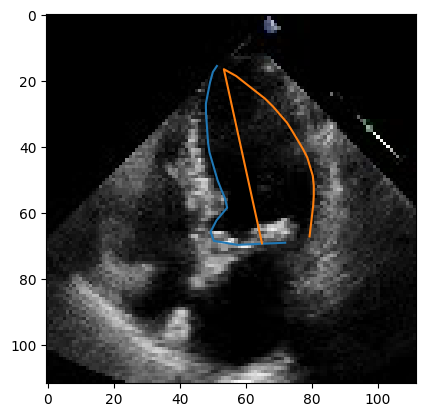

In [ ]:
from matplotlib import pyplot as plt
f46im = frames[46]
plt.imshow(f46im)
plt.plot(f46points['X1'],f46points['Y1'])
plt.plot(f46points['X2'],f46points['Y2'])

In [ ]:
"""The beginning of each systolic phase is detected by using the peak detection
algorithm from scipy (scipy.signal.find_peaks) and a video clip centered
around the beat is used for beat-by-beat prediction."""